In [ ]:
!pip install yfinance
!pip install --upgrade yfinance
!pip install arch
!pip install statsmodels.graphics.tsaplots
!pip install stargazer
!pip install yahoo_fin

import arch
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

fo
import stargazer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from yahoo_fin import options
from datetime import datetime, timedelta
from scipy.stats import norm
import math
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_arch
from scipy.stats import skew, kurtosis
from statsmodels.tsa.stattools import adfuller
import scipy.stats as stats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement statsmodels.graphics.tsaplots (from versions: none)
ERROR: No matching distribution found for statsmodels.graphics.tsaplots
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━

NameError: ignored

#**Part 1:** Running the GARCH model using Historical SPY Returns

In [ ]:
import pandas as pd
import yfinance as yf

ticker = "SPY"

# Define the start and end dates for the historical data
start_date = "2020-04-01"
end_date = "2023-04-01"

# Pull the historical data from Yahoo Finance using yfinance library
data55 = yf.download(ticker, start=start_date, end=end_date)

data55

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-01,247.979996,257.660004,243.899994,246.149994,235.134415,189554600
2020-04-02,245.190002,252.679993,244.589996,251.830002,240.560272,177660400
2020-04-03,250.759995,253.320007,245.220001,248.190002,237.083160,135561200
2020-04-06,257.839996,267.000000,248.169998,264.859985,253.007172,188061200
2020-04-07,274.209991,275.029999,264.890015,265.130005,253.265045,201427200
...,...,...,...,...,...,...
2023-03-27,398.119995,398.920013,395.559998,396.489990,396.489990,74010400
2023-03-28,395.769989,396.489990,393.690002,395.600006,395.600006,62871700
2023-03-29,399.929993,401.600006,398.679993,401.350006,401.350006,77497900


In [ ]:
ticker = "SPY"

# Define the start and end dates for the historical data
start_date = "2020-04-01"
end_date = "2023-04-01"

# Pull the historical data from Yahoo Finance using yfinance library
data55 = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


### Step 1: Data Scraping, Clearning, and Variable Creations

In [ ]:
# Define the ticker symbol for S&P 500
ticker = "SPY"

# Define the start and end dates for the historical data
start_date = "2020-04-01"
end_date = "2023-04-01"

# Pull the historical data from Yahoo Finance using yfinance library
data = yf.download(ticker, start=start_date, end=end_date)
data["Return"] = data['Adj Close'].pct_change() #create return
data['Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) #create log return
data = data.dropna()
df = data.loc[:,['Adj Close','Return','Log Return']]

df


[*********************100%***********************]  1 of 1 completed


,Adj Close,Return,Log Return
Date,,,
2020-04-02,240.560272,0.023075,0.022813
2020-04-03,237.083176,-0.014454,-0.014560
2020-04-06,253.007187,0.067166,0.065007
2020-04-07,253.265060,0.001019,0.001019
2020-04-08,261.766815,0.033569,0.033017
...,...,...,...
2023-03-27,396.489990,0.001870,0.001868
2023-03-28,395.600006,-0.002245,-0.002247
2023-03-29,401.350006,0.014535,0.014430


### Step 2: Raw Data Descriptions, Summary Statistics, and Test for Stationarity

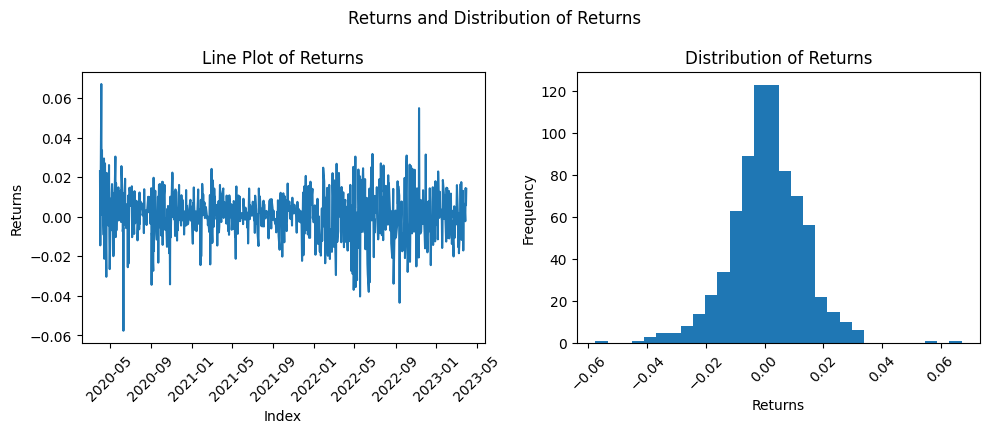

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(df["Return"])
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Returns")
axes[0].set_title("Line Plot of Returns")


axes[1].hist(df["Return"], bins=30)
axes[1].set_xlabel("Returns")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Returns")

# Set the overall title for the subplot
fig.suptitle("Returns and Distribution of Returns")

# Adjust layout to avoid overlapping
plt.tight_layout()

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)


plt.show()

In [ ]:
# Calculate skewness and kurtosis
skewness = df.skew()
kurtosis = df.kurtosis()

summary_table = df.describe()

# Add skewness and kurtosis as new rows to the summary table
summary_table.loc['skewness'] = skewness
summary_table.loc['kurtosis'] = kurtosis


summary_table

,Adj Close,Return,Log Return
count,755.000000,755.000000,755.000000
mean,384.145716,0.000813,0.000734
std,49.361576,0.012526,0.012529
min,237.083145,-0.057649,-0.059377
25%,356.991043,-0.006368,-0.006388
50%,393.170013,0.001019,0.001019
75%,421.855225,0.008548,0.008512
max,468.296387,0.067166,0.065007
skewness,-0.655827,-0.115485,-0.193454
kurtosis,-0.209636,2.216818,2.179812


In [ ]:
# ADF test for time series stationarity

adf_result = adfuller(df["Return"])
p_value = adf_result[1]
if p_value < 0.05:
    print("Time series is likely stationary")
else:
    print("Time series is likely non-stationary")

Time series is likely stationary


## Step 3: Running GARCH Models

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


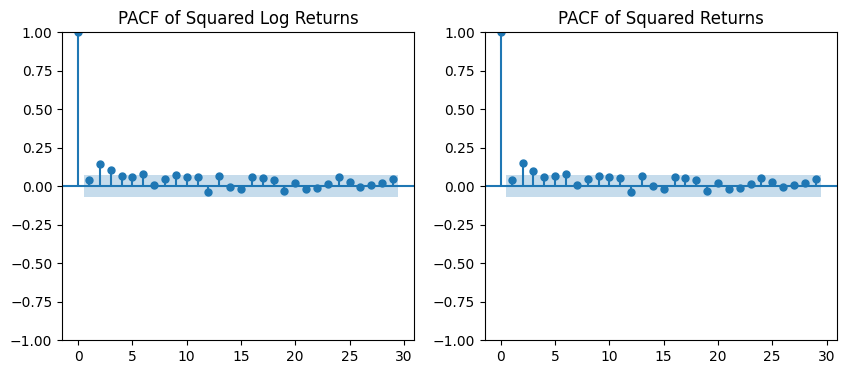

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


plot_pacf(df["Log Return"]**2, ax=axes[0], title="PACF of Squared Log Returns")
plot_pacf(df["Return"]**2, ax=axes[1], title="PACF of Squared Returns")



plt.show()

In [ ]:
lb_test_returns = acorr_ljungbox(df["Return"]**2)
lb_test_returns


,lb_stat,lb_pvalue
1,1.102146,2.937957e-01
2,18.526870,9.482904e-05
3,27.693554,4.211724e-06
4,33.377138,9.998603e-07
5,40.263752,1.321197e-07
6,49.165325,6.908916e-09
7,50.610955,1.095720e-08
8,57.028282,1.778000e-09
9,64.581736,1.739847e-10
10,71.778216,2.008729e-11


\
\begin{aligned}
\text{Conditional Variance:} & \quad \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2 \\
\end{aligned}
\


where:
\begin{align*}
\mu_t & : \text{conditional mean at time } t \\
\epsilon_t & : \text{innovation or error term at time } t \\
\sigma_t^2 & : \text{conditional variance at time } t \\
\omega & : \text{constant term representing the long-term average of } \sigma_t^2 \\
\alpha_i & : \text{ARCH parameters, representing the impact of past squared innovations on the current conditional variance} \\
\beta_j & : \text{GARCH parameters, representing the impact of past conditional variances on the current conditional variance} \\
p & : \text{order of the ARCH model} \\
q & : \text{order of the GARCH model} \\
\end{align*}


In [ ]:
model_11 = arch.arch_model(df["Return"], vol="GARCH", p=1, q=1) #GARCH (1,1)
results_11 = model_11.fit()
model_33 = arch.arch_model(df["Return"], vol="GARCH", p=3, q=3 )#GARCH (3,3)
results_33 = model_33.fit()
model_66 = arch.arch_model(df["Return"], vol="GARCH", p=6, q=6) #GARCH (6,6)
results_66= model_66.fit()

model_1 = arch.arch_model(df["Return"], vol="ARCH", p=1) #ARCH (1)
results_1 = model_1.fit()
model_3= arch.arch_model(df["Return"], vol="ARCH", p=3) #ARCH (3)
results_3 = model_3.fit()

In [ ]:
results_11.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2299.97
Distribution:                  Normal   AIC:                          -4591.94
Method:            Maximum Likelihood   BIC:                          -4573.43
                                        No. Observations:                  755
Date:                Mon, Apr 17 2023   Df Residuals:                      754
Time:                        04:24:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8752

In [ ]:
# unfortunately there are no good stargazer package for GARCH outputs - I wrote the code below so that comparing different garch models will be easier on the eyes.


def extract_results(result): #this is for looking at the model parameters

    # Extract data from results
    coefficients = result.params
    std_errors = result.std_err
    p_values = result.pvalues


    # Create a dataframe to store the results
    results_table = pd.DataFrame(index=result.params.index.tolist())

    # Add rows

    results_table.loc[result.params.index, 'Coefficients'] = coefficients
    results_table.loc[result.params.index, 'Standard Errors'] = std_errors
    results_table.loc[result.params.index, 'P-Values'] = p_values

    return results_table


def extract_diagnostic(result): #this is for looking at the information criterias and goodness of fit stats

    log_likelihood = result.loglikelihood
    aic = result.aic
    bic = result.bic

    results_table = pd.DataFrame(columns=['Value'])

    results_table.loc['AIC', 'Value'] = aic
    results_table.loc['BIC', 'Value'] = bic
    results_table.loc['Log Likelihood', 'Value'] = log_likelihood


    return results_table

In [ ]:
diagnostic_table11 = extract_diagnostic(results_11)
diagnostic_table33 = extract_diagnostic(results_33)
diagnostic_table66 = extract_diagnostic(results_66)
diagnostic_table1 = extract_diagnostic(results_1)
diagnostic_table3 = extract_diagnostic(results_3)

column_names = ['GARCH(1,1)','GARCH(3,3)', 'GARCH(6,6)',"ARCH(1)",'ARCH(3)']
summary_diagnostic = pd.concat([diagnostic_table11,diagnostic_table33,diagnostic_table66,diagnostic_table1,diagnostic_table3],axis = 1)
summary_diagnostic.columns = column_names


summary_diagnostic

,"GARCH(1,1)","GARCH(3,3)","GARCH(6,6)",ARCH(1),ARCH(3)
AIC,-4591.941598,-4579.321199,-4563.155951,-4477.868754,-4543.483024
BIC,-4573.434727,-4542.307457,-4498.381903,-4463.9886,-4520.349435
Log Likelihood,2299.970799,2297.6606,2295.577976,2241.934377,2276.741512


In [ ]:
# GARCH Summary Tables
summary_table11 = extract_results(results_11)
summary_table33 = extract_results(results_33)
summary_table66 = extract_results(results_66)

# ARCH Summary Tables
summary_table1 = extract_results(results_1)
summary_table3 = extract_results(results_3)

In [ ]:
GARCH_table = pd.concat([summary_table11,summary_table33,summary_table66],axis =1 ).fillna(" ")

master_columns = ['GArch(1,1)','GARCH(3,3)', 'GARCH(6,6)']
sub_columns = ['Coefficients', 'Standard Errors', 'P-Values']
column_names = [f"{master_col}_{sub_col}" for master_col in master_columns for sub_col in sub_columns]

GARCH_table.columns = column_names
GARCH_table


,"GArch(1,1)_Coefficients","GArch(1,1)_Standard Errors","GArch(1,1)_P-Values","GARCH(3,3)_Coefficients","GARCH(3,3)_Standard Errors","GARCH(3,3)_P-Values","GARCH(6,6)_Coefficients","GARCH(6,6)_Standard Errors","GARCH(6,6)_P-Values"
mu,0.000786,0.000405,0.0523,0.000764,0.000018,0.0,0.000696,6.303758e-06,0.000000
omega,0.000003,0.0,0.0,0.000003,0.0,0.0,0.000003,2.552106e-11,0.000000
alpha[1],0.1,0.009234,0.0,0.033333,0.054207,0.538606,0.033333,2.093959e-02,0.111412
beta[1],0.88,0.001179,0.0,0.293333,0.775165,0.705123,0.130000,3.114883e-01,0.676422
alpha[2],,,,0.033333,0.087665,0.703771,0.033333,3.163239e-02,0.291985
alpha[3],,,,0.033333,0.140676,0.812694,0.033333,5.123937e-02,0.515343
beta[2],,,,0.293333,2.668684,0.912475,0.130000,9.902230e-01,0.895551
beta[3],,,,0.293333,1.957992,0.880912,0.130000,7.533992e-01,0.863004
alpha[4],,,,,,,0.033333,6.602655e-02,0.613666
alpha[5],,,,,,,0.033333,4.835961e-02,0.490647


In [ ]:
ARCH_table = pd.concat([summary_table1,summary_table3],axis =1).fillna(" ")
master_columns = ['ARCH(1)', 'ARCH(3)']
sub_columns = ['Coefficients', 'Standard Errors', 'P-Values']
column_names = [f"{master_col}_{sub_col}" for master_col in master_columns for sub_col in sub_columns]

ARCH_table.columns = column_names
ARCH_table


,ARCH(1)_Coefficients,ARCH(1)_Standard Errors,ARCH(1)_P-Values,ARCH(3)_Coefficients,ARCH(3)_Standard Errors,ARCH(3)_P-Values
mu,0.001136,0.000524,0.030068,0.000970,0.000435,2.575053e-02
omega,0.000126,0.000013,0.0,0.000063,0.000010,2.182766e-10
alpha[1],0.200393,0.114748,0.080747,0.200000,0.096880,3.897804e-02
alpha[2],,,,0.200000,0.047008,2.094576e-05
alpha[3],,,,0.200000,0.061544,1.155179e-03


In [ ]:
# We select the GARCH(1,1)
summary_table11

,Coefficients,Standard Errors,P-Values
mu,0.000786,4.049834e-04,5.229951e-02
omega,0.000003,5.859165e-12,0.000000e+00
alpha[1],0.100000,9.234188e-03,2.500008e-27
beta[1],0.880000,1.179081e-03,0.000000e+00


## Step 4: Specification Tests

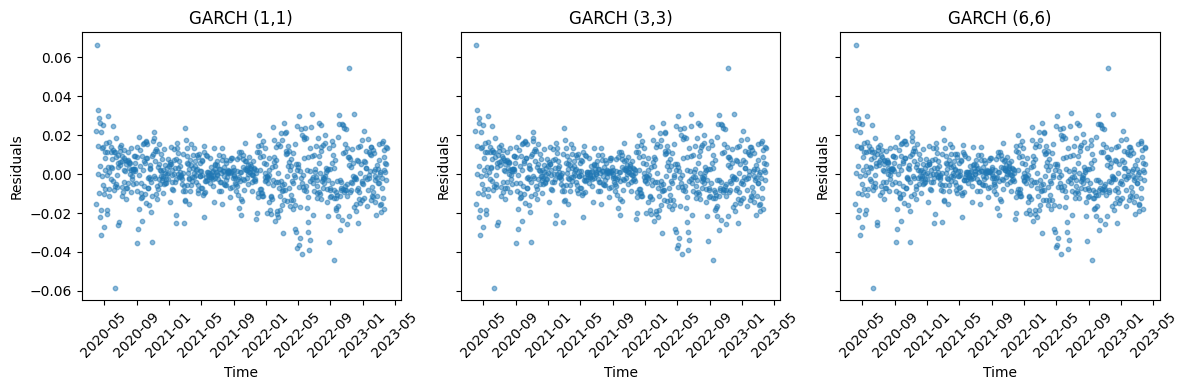

In [ ]:
# Residual Plots of all GARCH models

# Create figure and axis objects for subplot layout
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.subplots_adjust(wspace=0.4)

# Scatter plot of residuals for 'results'
axes[0].scatter(results_11.resid.index, results_11.resid, s=10, alpha=0.5)
axes[0].set_title('GARCH (1,1)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Residuals')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Scatter plot of residuals for 'results2'
axes[1].scatter(results_33.resid.index, results_33.resid, s=10, alpha=0.5)
axes[1].set_title('GARCH (3,3)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Residuals')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Scatter plot of residuals for 'results3'
axes[2].scatter(results_66.resid.index, results_66.resid, s=10, alpha=0.5)
axes[2].set_title('GARCH (6,6)')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Residuals')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Ljung Box Text on Garch(1,1)
lb_test11 = acorr_ljungbox(results_11.resid)
lb_test11


,lb_stat,lb_pvalue
1,1.546056,0.213719
2,1.674974,0.432797
3,2.278365,0.516678
4,3.514984,0.475604
5,3.563525,0.613798
6,5.418756,0.491330
7,5.536434,0.594793
8,5.566415,0.695671
9,10.652587,0.300276
10,16.896176,0.076693


## Step 5: Get Volatility Forecasts

In [ ]:
model_fit = model_11.fit(disp='off')
horizon = 3*365 # benefit of hind sight for later but we know that the lastest expiration in our options is December 2025 so we forecast 3 years
pred = model_fit.forecast(horizon= horizon)
future_dates = [df["Return"].index[-1] + timedelta(days=i) for i in range(1,horizon+1)]
weekdays = [date for date in future_dates if date.weekday() < 5]
pred = pd.DataFrame(np.sqrt(pred.variance.values[-1,:]), columns = ["Volatility"],index=future_dates)
pred

/usr/local/lib/python3.9/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


,Volatility
2023-04-01,0.010872
2023-04-02,0.010907
2023-04-03,0.010942
2023-04-04,0.010975
2023-04-05,0.011008
...,...
2026-03-26,0.012518
2026-03-27,0.012518
2026-03-28,0.012518
2026-03-29,0.012518


Text(0.5, 1.0, 'Volatility Prediction - Next 3 Years')

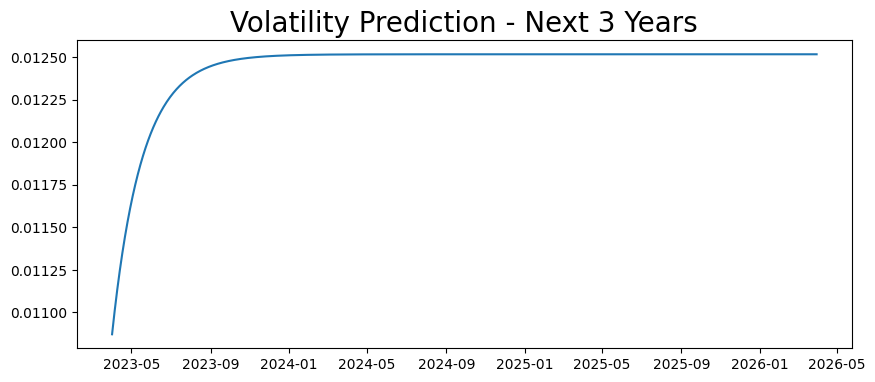

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 3 Years', fontsize=20)


##**Part 2:** Compare with Market Price

Step 1: Data Scaping and Cleaning

In [ ]:
spy_dates = options.get_expiration_dates(ticker) #get all expiration date of all exisitng market options

x = []
for date in spy_dates:
  call_price = options.get_calls(ticker,date) # get all exisiting options
  x.append(call_price)


In [ ]:
call_price = pd.concat(x).reset_index(drop = True)
call_price = call_price.loc[:,["Contract Name","Strike","Last Price","Implied Volatility"]]  #scape information that we need

call_price

,Contract Name,Strike,Last Price,Implied Volatility
0,SPY230417C00330000,330.0,76.74,216.80%
1,SPY230417C00350000,350.0,59.39,167.87%
2,SPY230417C00375000,375.0,35.01,107.42%
3,SPY230417C00377000,377.0,34.03,102.44%
4,SPY230417C00380000,380.0,32.68,95.12%
...,...,...,...,...
2666,SPY251219C00630000,630.0,2.56,17.94%
2667,SPY251219C00635000,635.0,2.50,18.21%
2668,SPY251219C00640000,640.0,2.50,18.20%
2669,SPY251219C00645000,645.0,2.70,16.10%


In [ ]:
# transform the implied vol to numeric data and divide it by 100
call_price["Implied Volatility"] = pd.to_numeric(call_price["Implied Volatility"].str.strip('%')) / 100

In [ ]:
def extract_expiration_date(option_code): # define a funciton that extracs the Expiration date from the Ticker
    year = option_code[3:5]
    month = option_code[5:7]
    day = option_code[7:9]
    return f"20{year}-{month}-{day}"

call_price["Expiration"] = call_price["Contract Name"].apply(extract_expiration_date)
call_price


,Contract Name,Strike,Last Price,Implied Volatility,Expiration
0,SPY230417C00330000,330.0,76.74,2.1680,2023-04-17
1,SPY230417C00350000,350.0,59.39,1.6787,2023-04-17
2,SPY230417C00375000,375.0,35.01,1.0742,2023-04-17
3,SPY230417C00377000,377.0,34.03,1.0244,2023-04-17
4,SPY230417C00380000,380.0,32.68,0.9512,2023-04-17
...,...,...,...,...,...
2666,SPY251219C00630000,630.0,2.56,0.1794,2025-12-19
2667,SPY251219C00635000,635.0,2.50,0.1821,2025-12-19
2668,SPY251219C00640000,640.0,2.50,0.1820,2025-12-19
2669,SPY251219C00645000,645.0,2.70,0.1610,2025-12-19


In [ ]:
date = "2023-03-31"
date= datetime.strptime(date, "%Y-%m-%d")

call_price['Expiration'] = pd.to_datetime(call_price['Expiration'])
call_price['Maturity'] = (call_price['Expiration']- date).dt.days/252  #calculate the time till maturity based on expiration

call_price

,Contract Name,Strike,Last Price,Implied Volatility,Expiration,Maturity
0,SPY230417C00330000,330.0,76.74,2.1680,2023-04-17,0.067460
1,SPY230417C00350000,350.0,59.39,1.6787,2023-04-17,0.067460
2,SPY230417C00375000,375.0,35.01,1.0742,2023-04-17,0.067460
3,SPY230417C00377000,377.0,34.03,1.0244,2023-04-17,0.067460
4,SPY230417C00380000,380.0,32.68,0.9512,2023-04-17,0.067460
...,...,...,...,...,...,...
2666,SPY251219C00630000,630.0,2.56,0.1794,2025-12-19,3.944444
2667,SPY251219C00635000,635.0,2.50,0.1821,2025-12-19,3.944444
2668,SPY251219C00640000,640.0,2.50,0.1820,2025-12-19,3.944444
2669,SPY251219C00645000,645.0,2.70,0.1610,2025-12-19,3.944444


In [ ]:
merged_df = pd.merge(call_price, pred, how='inner', left_on= 'Expiration',right_index = True)
merged_df = merged_df.rename(columns={'Volatility': 'GARCH Volatility'}) #add the calcualted GARCH Volatility from the Above Model and based on Expiration Date
merged_df

,Contract Name,Strike,Last Price,Implied Volatility,Expiration,Maturity,GARCH Volatility
0,SPY230417C00330000,330.0,76.74,2.1680,2023-04-17,0.067460,0.011350
1,SPY230417C00350000,350.0,59.39,1.6787,2023-04-17,0.067460,0.011350
2,SPY230417C00375000,375.0,35.01,1.0742,2023-04-17,0.067460,0.011350
3,SPY230417C00377000,377.0,34.03,1.0244,2023-04-17,0.067460,0.011350
4,SPY230417C00380000,380.0,32.68,0.9512,2023-04-17,0.067460,0.011350
...,...,...,...,...,...,...,...
2666,SPY251219C00630000,630.0,2.56,0.1794,2025-12-19,3.944444,0.012518
2667,SPY251219C00635000,635.0,2.50,0.1821,2025-12-19,3.944444,0.012518
2668,SPY251219C00640000,640.0,2.50,0.1820,2025-12-19,3.944444,0.012518
2669,SPY251219C00645000,645.0,2.70,0.1610,2025-12-19,3.944444,0.012518


In [ ]:
merged_df['GARCH Volatility'] = merged_df['GARCH Volatility'] * (252 ** 0.5) #annualize the GARCH Volatility for Black Scholes Conventions
implied_vol_col = merged_df.pop('Implied Volatility')
merged_df = merged_df.assign(**{'Implied Volatility': implied_vol_col})
last_price_col = merged_df.pop('Last Price')
cleaned_df = merged_df.assign(**{'Last Price': last_price_col}) #finally!
cleaned_df

,Contract Name,Strike,Expiration,Maturity,GARCH Volatility,Implied Volatility,Last Price
0,SPY230417C00330000,330.0,2023-04-17,0.067460,0.180181,2.1680,76.74
1,SPY230417C00350000,350.0,2023-04-17,0.067460,0.180181,1.6787,59.39
2,SPY230417C00375000,375.0,2023-04-17,0.067460,0.180181,1.0742,35.01
3,SPY230417C00377000,377.0,2023-04-17,0.067460,0.180181,1.0244,34.03
4,SPY230417C00380000,380.0,2023-04-17,0.067460,0.180181,0.9512,32.68
...,...,...,...,...,...,...,...
2666,SPY251219C00630000,630.0,2025-12-19,3.944444,0.198712,0.1794,2.56
2667,SPY251219C00635000,635.0,2025-12-19,3.944444,0.198712,0.1821,2.50
2668,SPY251219C00640000,640.0,2025-12-19,3.944444,0.198712,0.1820,2.50
2669,SPY251219C00645000,645.0,2025-12-19,3.944444,0.198712,0.1610,2.70


In [ ]:
def black_scholes(spot, strike, maturity, risk_free_rate, sigma, option_type): #define the black schole formula so we can calculate price based on our GARCH volatility

    d1 = (math.log(spot / strike) + (risk_free_rate + 0.5 * sigma ** 2) * maturity) / (sigma * math.sqrt(maturity))
    d2 = d1 - sigma * math.sqrt(maturity)

    if option_type == 'call':
        option_price = spot * norm.cdf(d1) - strike * math.exp(-risk_free_rate * maturity) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = strike * math.exp(-risk_free_rate * maturity) * norm.cdf(-d2) - spot * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Must be either 'call' or 'put'.")

    return option_price

In [ ]:
spot = round(df["Adj Close"][date],0) #take current price as spot price
risk_free_rate = 0.045 # approximate risk free rate based on current treasury bill
option_type = "call"
cleaned_df['GARCH Price'] = cleaned_df.apply(lambda row: black_scholes(spot, row['Strike'], row['Maturity'], risk_free_rate, row['GARCH Volatility'], option_type), axis=1)

In [ ]:
cleaned_df

,Contract Name,Strike,Expiration,Maturity,GARCH Volatility,Implied Volatility,Last Price,GARCH Price
0,SPY230417C00330000,330.0,2023-04-17,0.067460,0.180181,2.1680,76.74,80.000272
1,SPY230417C00350000,350.0,2023-04-17,0.067460,0.180181,1.6787,59.39,60.062459
2,SPY230417C00375000,375.0,2023-04-17,0.067460,0.180181,1.0742,35.01,35.328953
3,SPY230417C00377000,377.0,2023-04-17,0.067460,0.180181,1.0244,34.03,33.400859
4,SPY230417C00380000,380.0,2023-04-17,0.067460,0.180181,0.9512,32.68,30.544511
...,...,...,...,...,...,...,...,...
2666,SPY251219C00630000,630.0,2025-12-19,3.944444,0.198712,0.1794,2.56,28.419335
2667,SPY251219C00635000,635.0,2025-12-19,3.944444,0.198712,0.1821,2.50,27.594343
2668,SPY251219C00640000,640.0,2025-12-19,3.944444,0.198712,0.1820,2.50,26.792332
2669,SPY251219C00645000,645.0,2025-12-19,3.944444,0.198712,0.1610,2.70,26.012729


Step 2: Comparisons and Analysis

In [ ]:
cleaned_df["Difference"] = cleaned_df["GARCH Price"]-cleaned_df["Last Price"]

atm_strikes = cleaned_df[cleaned_df['Strike'] == spot]
year_end = cleaned_df[cleaned_df['Expiration'] == "2023-12-29"]



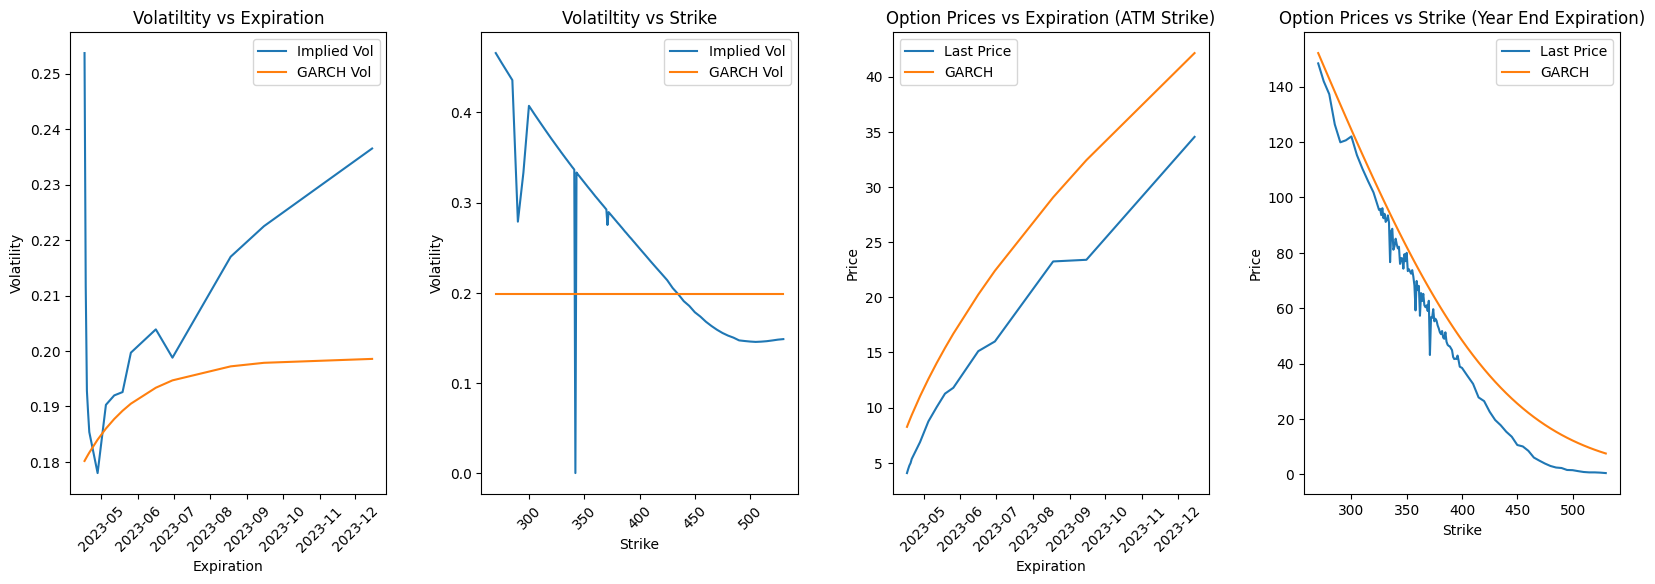

In [ ]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 6))

ax1.plot(atm_strikes["Expiration"], atm_strikes["Implied Volatility"], label='Implied Vol')
ax1.plot(atm_strikes["Expiration"], atm_strikes["GARCH Volatility"], label='GARCH Vol')
ax1.set_xlabel('Expiration')
ax1.set_ylabel('Volatility')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Volatiltity vs Expiration')
ax1.legend()

ax2.plot(year_end["Strike"], year_end["Implied Volatility"], label='Implied Vol')
ax2.plot(year_end["Strike"], year_end["GARCH Volatility"], label='GARCH Vol')
ax2.set_xlabel('Strike')
ax2.set_ylabel('Volatility')
ax2.tick_params(axis='x', rotation=45)
ax2.set_title('Volatiltity vs Strike')
ax2.legend()

ax3.plot(atm_strikes["Expiration"], atm_strikes["Last Price"], label='Last Price')
ax3.plot(atm_strikes["Expiration"], atm_strikes["GARCH Price"], label='GARCH')
ax3.set_xlabel('Expiration')
ax3.set_ylabel('Price')
ax3.tick_params(axis='x', rotation=45)
ax3.set_title('Option Prices vs Expiration (ATM Strike)')
ax3.legend()


ax4.plot(year_end["Strike"], year_end["Last Price"], label='Last Price')
ax4.plot(year_end["Strike"], year_end["GARCH Price"], label='GARCH')
ax4.set_xlabel('Strike')
ax4.set_ylabel('Price')
ax4.set_title('Option Prices vs Strike (Year End Expiration)')
ax4.legend()


plt.subplots_adjust(wspace=0.3)


plt.show()

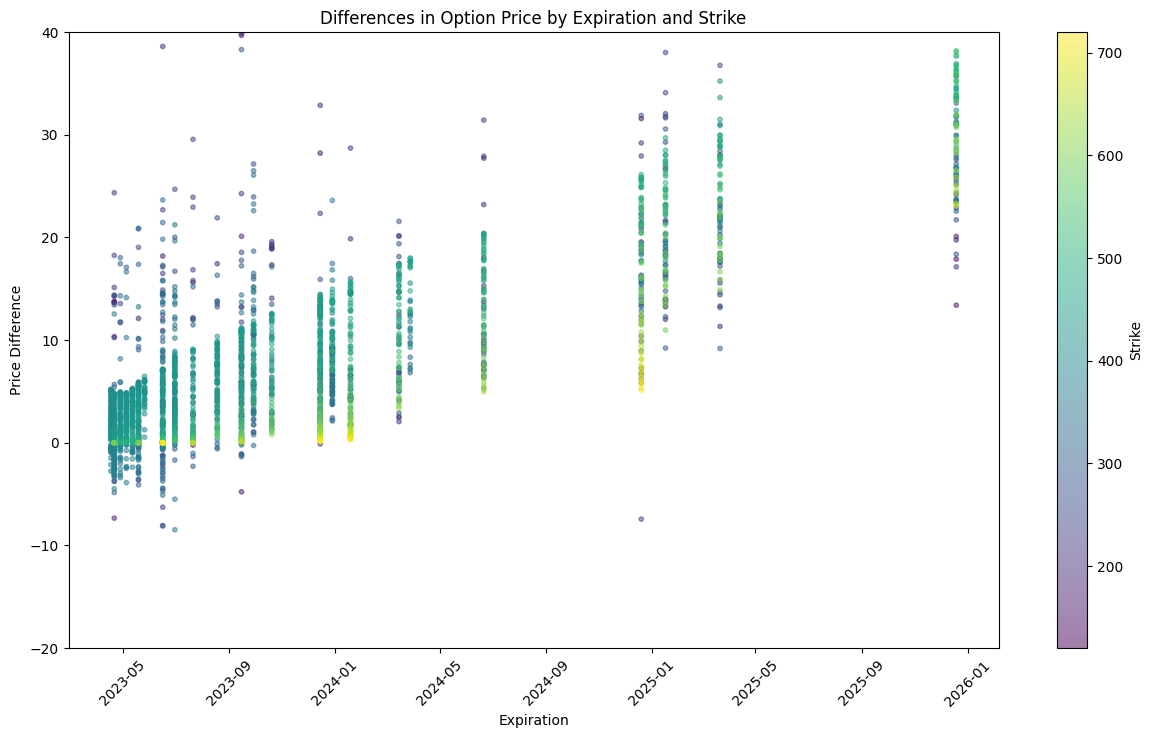

In [ ]:

fig, ax = plt.subplots(figsize=(15,8))


sc = ax.scatter(cleaned_df["Expiration"], cleaned_df["Difference"], c=cleaned_df["Strike"], cmap='viridis', s=10, alpha=0.5)
ax.set_title('Differences in Option Price by Expiration and Strike')
ax.set_xlabel('Expiration')
ax.set_ylabel('Price Difference')
ax.tick_params(axis='x', rotation=45)


cbar = plt.colorbar(sc)
cbar.set_label('Strike')

ax.set_ylim(-20,40)


plt.show()

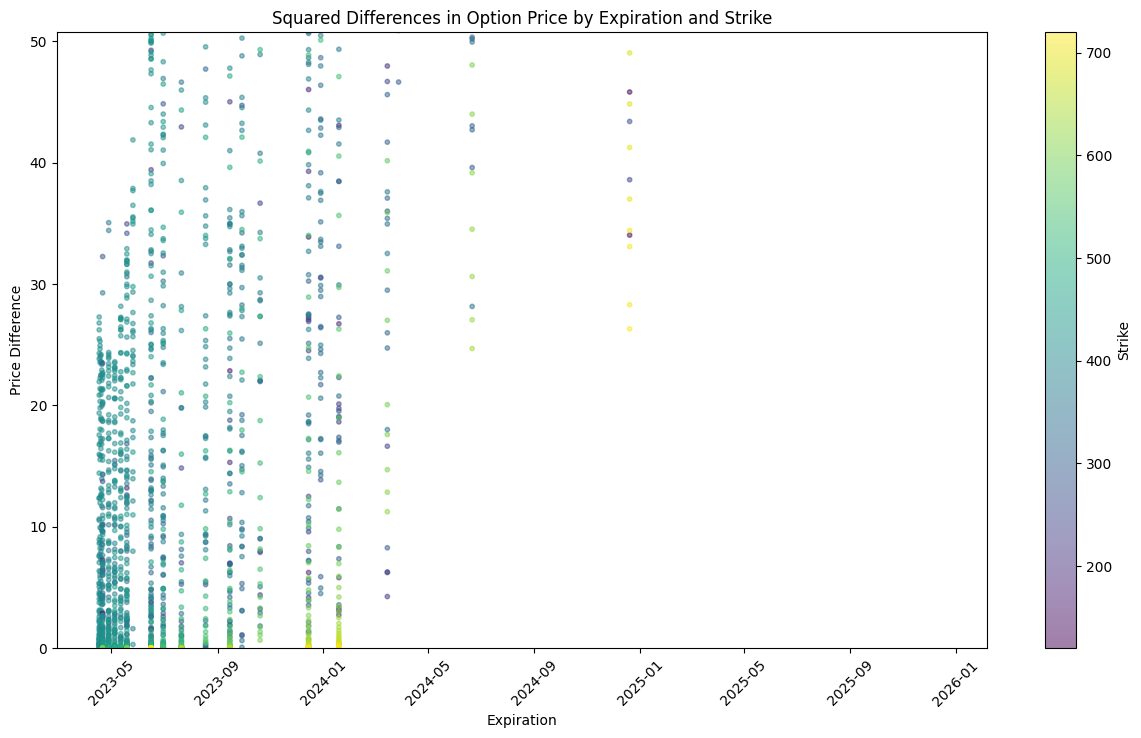

In [ ]:
cleaned_df["Squared Difference"] = cleaned_df["Difference"]**2

fig, ax = plt.subplots(figsize=(15,8))

sc = ax.scatter(cleaned_df["Expiration"], cleaned_df["Squared Difference"], c=cleaned_df["Strike"], cmap='viridis', s=10, alpha=0.5)
ax.set_title('Squared Differences in Option Price by Expiration and Strike')
ax.set_xlabel('Expiration')
ax.set_ylabel('Price Difference')
ax.tick_params(axis='x', rotation=45)


cbar = plt.colorbar(sc)
cbar.set_label('Strike')

ax.set_ylim(0,cleaned_df["Difference"].max())


plt.show()

## Robustness Check - Running a EGARCH

In [ ]:
emodel_11 = arch.arch_model(df["Return"], vol="EGARCH", p=1, q=1) #GARCH (1,1)
eresults_11 = emodel_11.fit()



In [ ]:
eresults_11.summary

<bound method ARCHModelResult.summary of                      Constant Mean - EGARCH Model Results                     
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                2299.28
Distribution:                  Normal   AIC:                          -4590.57
Method:            Maximum Likelihood   BIC:                          -4572.06
                                        No. Observations:                  755
Date:                Mon, Apr 17 2023   Df Residuals:                      754
Time:                        02:36:53   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8138

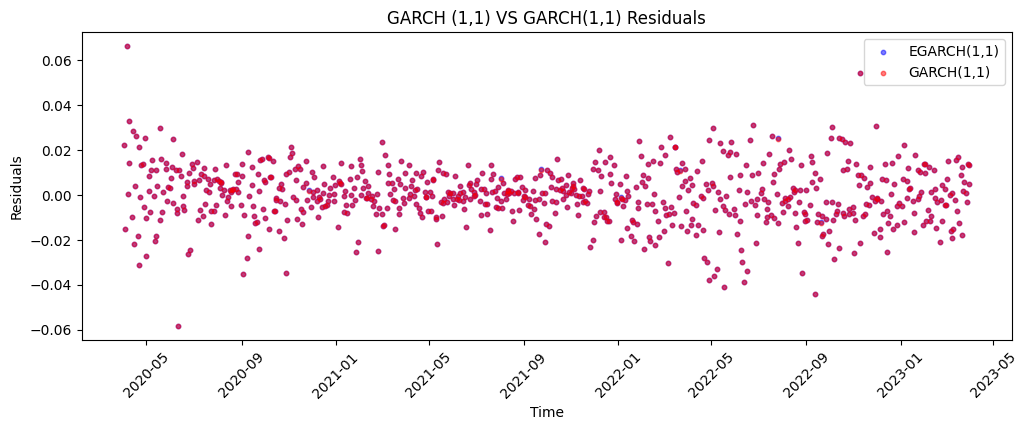

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(eresults_11.resid.index, eresults_11.resid, s=10, alpha=0.5, c='blue', label='EGARCH(1,1)')
ax.scatter(results_11.resid.index, results_11.resid, s=10, alpha=0.5, c='red', label='GARCH(1,1)')
ax.set_title('GARCH (1,1) VS GARCH(1,1) Residuals')
ax.set_xlabel('Time')
ax.set_ylabel('Residuals')
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
ax.legend()
plt.show()

In [ ]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(eresults_11.resid, results_11.resid)


print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

# Set significance level
alpha = 0.05

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject null hypothesis. Means are not equal.")
else:
    print("Fail to reject null hypothesis. Means are equal.")


T-statistic:  0.007071568217230841
P-value:  0.9943586872637682
Fail to reject null hypothesis. Means are equal.


In [ ]:
mse1 = np.mean(eresults_11.resid**2)  # Mean squared error
egarch_rmse = np.sqrt(mse1)  # Root mean squared error

# Calculate RMSE for resid2
mse2 = np.mean(results_11.resid**2)  r
garch_rmse = np.sqrt(mse2)


print("RMSE for EGARCH:", egarch_rmse)
print("RMSE for GARCH:", garch_rmse)

RMSE for EGARCH: 0.012517288559152693
RMSE for GARCH: 0.01251727783464455
